In [3]:
from plot_service import *
from numpy import *

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.model_selection import learning_curve

from keras.wrappers.scikit_learn import KerasRegressor

In [4]:
train_file = 'datasets/redshifts.csv'

X = loadtxt(train_file, usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), unpack=True, delimiter=',').T
Y = loadtxt(train_file, unpack=True, usecols=(11), delimiter=',')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('Data loaded!')

Data loaded!


In [5]:
plot_simple_table(X_train.T[:, :30])

| 20.8201 | 18.5113 | 17.2795 | 16.7894 | 16.4611 | 0.181395  | 0.0123181  | 0.00690208 | 0.00650488 | 0.0170449  |
| 19.1041 | 17.3282 | 16.304  | 15.8546 | 15.5137 | 0.0542467 | 0.00679417 | 0.00442695 | 0.00423764 | 0.00878743 |
| 20.6168 | 18.5021 | 17.3794 | 16.9137 | 16.5403 | 0.147581  | 0.0111245  | 0.00677101 | 0.00662477 | 0.0145896  |
| 22.0622 | 20.1525 | 18.4359 | 17.706  | 17.2676 | 0.56777   | 0.051707   | 0.0177945  | 0.0141868  | 0.0334817  |
| 20.2099 | 18.3034 | 17.2462 | 16.819  | 16.4606 | 0.0796464 | 0.00858408 | 0.00567301 | 0.00556344 | 0.0111667  |
| 20.7708 | 18.6046 | 17.3616 | 16.9112 | 16.5767 | 0.126928  | 0.0101941  | 0.00598473 | 0.00575985 | 0.0128102  |
| 22.5801 | 20.5084 | 18.6342 | 17.8495 | 17.4039 | 1.10245   | 0.0779481  | 0.0216593  | 0.0163227  | 0.0391475  |
| 18.8676 | 17.5225 | 17.0249 | 16.7668 | 16.6301 | 0.0523219 | 0.00970681 | 0.00734196 | 0.00740002 | 0.0195377  |
| 19.3541 | 17.5048 | 16.5986 | 16.1868 | 15.886  | 0.0433344 | 0.005688

In [7]:
def build_learning_data(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=3, scoring='neg_mean_squared_error', train_sizes=linspace(0.01, 1.0, 50))

    # Create means and standard deviations of training set scores
    train_mean = mean(train_scores, axis=1)
    train_std = std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = mean(test_scores, axis=1)
    test_std = std(test_scores, axis=1)

    return train_sizes, train_mean, train_std, test_mean, test_std

In [6]:
def create_baseline_model():
    model = Sequential()
    model.add(Dense(300, input_dim=10, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    
    return model

In [8]:
model = KerasRegressor(build_fn=create_baseline_model)
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)
preds = model.predict(X_test)

Train on 279216 samples, validate on 69804 samples
Epoch 1/30
279216/279216 [==============================] - 30s 108us/step - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2/30
279216/279216 [==============================] - 30s 108us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 3/30
279216/279216 [==============================] - 30s 109us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 4/30
279216/279216 [==============================] - 30s 107us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 5/30
279216/279216 [==============================] - 30s 107us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 6/30
279216/279216 [==============================] - 30s 108us/step - loss: 0.0022 - me

In [9]:
pred = preds.reshape(len(preds))
real = y_test

plot_table(real, pred)

|     Real |   Predict |
|----------+-----------|
| 0.202258 | 0.0850745 |
| 0.384286 | 0.252183  |
| 0.033815 | 0.027167  |
| 0.635514 | 0.543373  |
| 0.082844 | 0.0712498 |
| 0.077451 | 0.138618  |
| 0.173062 | 0.134077  |
| 0.140931 | 0.118058  |
| 0.042802 | 0.046063  |
| 0.080199 | 0.0624953 |
| 0.159216 | 0.0988973 |
| 0.275251 | 0.242391  |
| 0.137887 | 0.109107  |
| 0.242895 | 0.14299   |
| 0.085739 | 0.0875432 |
| 0.167368 | 0.148687  |
| 0.049474 | 0.0500641 |
| 0.389837 | 0.28126   |
| 0.175565 | 0.118525  |
| 0.12229  | 0.0754365 |
| 0.18369  | 0.128603  |
| 0.066047 | 0.0636408 |
| 0.101232 | 0.0927344 |
| 0.188021 | 0.150654  |
| 0.25487  | 0.394796  |
| 0.088456 | 0.0812787 |
| 0.135544 | 0.0990031 |
| 0.333799 | 0.273716  |
| 0.257815 | 0.223517  |
| 0.066265 | 0.0768544 |
| 0.085536 | 0.0978271 |
| 0.380118 | 0.282098  |
| 0.14705  | 0.087056  |
| 0.503077 | 0.434453  |
| 0.071456 | 0.0947991 |
| 0.001909 | 0.09124   |
| 0.146141 | 0.101231  |
| 0.343    | 0.233462  |


In [10]:
score = model.score(X_val, y_val)
print('Cross-Val Score:', score)

69804/69804 [==============================] - 2s 24us/step
Cross-Val Score: -0.0031517537343


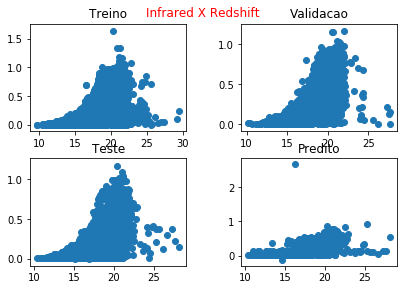

In [11]:
plot_scatter(X_train, y_train, X_val, y_val, X_test, y_test, preds, show_only=True)

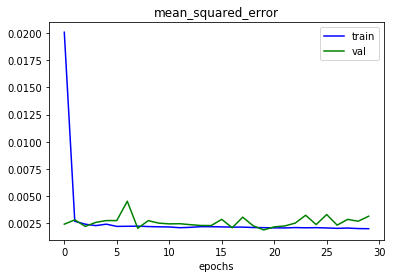

In [12]:
plot(hist.history, 'mean_squared_error', show_only=True)

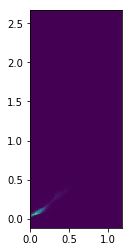

In [13]:
plot_hm(real, pred, show_only=True)

In [14]:
train_sizes, train_mean, train_std, test_mean, test_std = build_learning_data(model, X_train, y_train)

Epoch 1/1
1861/1861 [==============================] - 0s 177us/step - loss: 1.2582 - mean_squared_error: 1.2582
Epoch 1/1
5622/5622 [==============================] - 1s 95us/step - loss: 0.4396 - mean_squared_error: 0.4396
Epoch 1/1
9383/9383 [==============================] - 1s 94us/step - loss: 0.8087 - mean_squared_error: 0.8087
Epoch 1/1
13144/13144 [==============================] - 1s 87us/step - loss: 0.1900 - mean_squared_error: 0.1900
Epoch 1/1
16904/16904 [==============================] - 1s 85us/step - loss: 0.2451 - mean_squared_error: 0.2451
Epoch 1/1
20665/20665 [==============================] - 2s 84us/step - loss: 0.1053 - mean_squared_error: 0.1053
Epoch 1/1
24426/24426 [==============================] - 2s 83us/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 1/1
28187/28187 [==============================] - 2s 82us/step - loss: 0.1316 - mean_squared_error: 0.1316
Epoch 1/1
31948/31948 [==============================] - 3s 84us/step - loss: 0.1259 - mean_s

77078/77078 [==============================] - 11s 138us/step - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 1/1
80839/80839 [==============================] - 11s 136us/step - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 1/1
84600/84600 [==============================] - 11s 134us/step - loss: 0.0448 - mean_squared_error: 0.0448
Epoch 1/1
88361/88361 [==============================] - 12s 135us/step - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 1/1
92122/92122 [==============================] - 12s 132us/step - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 1/1
95883/95883 [==============================] - 13s 136us/step - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 1/1
99644/99644 [==============================] - 13s 134us/step - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 1/1
103404/103404 [==============================] - 14s 137us/step - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 1/1
107165/107165 [==============================] - 15s 139us/step - loss

152296/152296 [==============================] - 28s 182us/step - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 1/1
156057/156057 [==============================] - 28s 178us/step - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 1/1
159817/159817 [==============================] - 29s 183us/step - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 1/1
163578/163578 [==============================] - 29s 179us/step - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 1/1
167339/167339 [==============================] - 30s 178us/step - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 1/1
171100/171100 [==============================] - 30s 178us/step - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 1/1
174861/174861 [==============================] - 31s 178us/step - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 1/1
178622/178622 [==============================] - 32s 179us/step - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 1/1
182383/182383 [==============================] - 33s 181

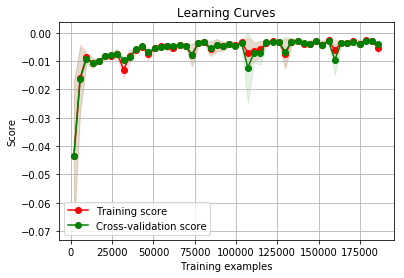

In [15]:
plot_curves(train_sizes, train_mean, train_std, test_mean, test_std, show_only=True)